In [1]:
import pandas as pd
df= pd.read_csv('C:/Users/Danny Chacko/Downloads/test1.csv')
def s(word):
    return word.strip()
df['Date']= df['Date'].apply(s)

In [2]:
sums= df.sum(axis=0)
#To get columns with letter A or a in name, just do df.filter(regex= '[aA]'), same for no.s
#Automate column dropping is string late
sums_filter= sums.drop(['Date', 'Title', 'Name'])
#sums= sums.reset_index
# Looking at data overall
sums_filter= sums_filter.astype('int64') #convert from object to int64 type
total= sums_filter.sum(axis=0)
print("There are a total of", total, "values in our dataset.")

word= sums_filter.filter(regex= '^[A-Za-z]+$', axis=0)
print("The most used word is", "'" + word.idxmax() +"'.")

number= sums_filter.filter(regex= '[0-9]', axis=0)
print("The most used number is", number.idxmax() + ".")

There are a total of 2767554 values in our dataset.
The most used word is 'the'.
The most used number is 000.


<IPython.core.display.Javascript object>


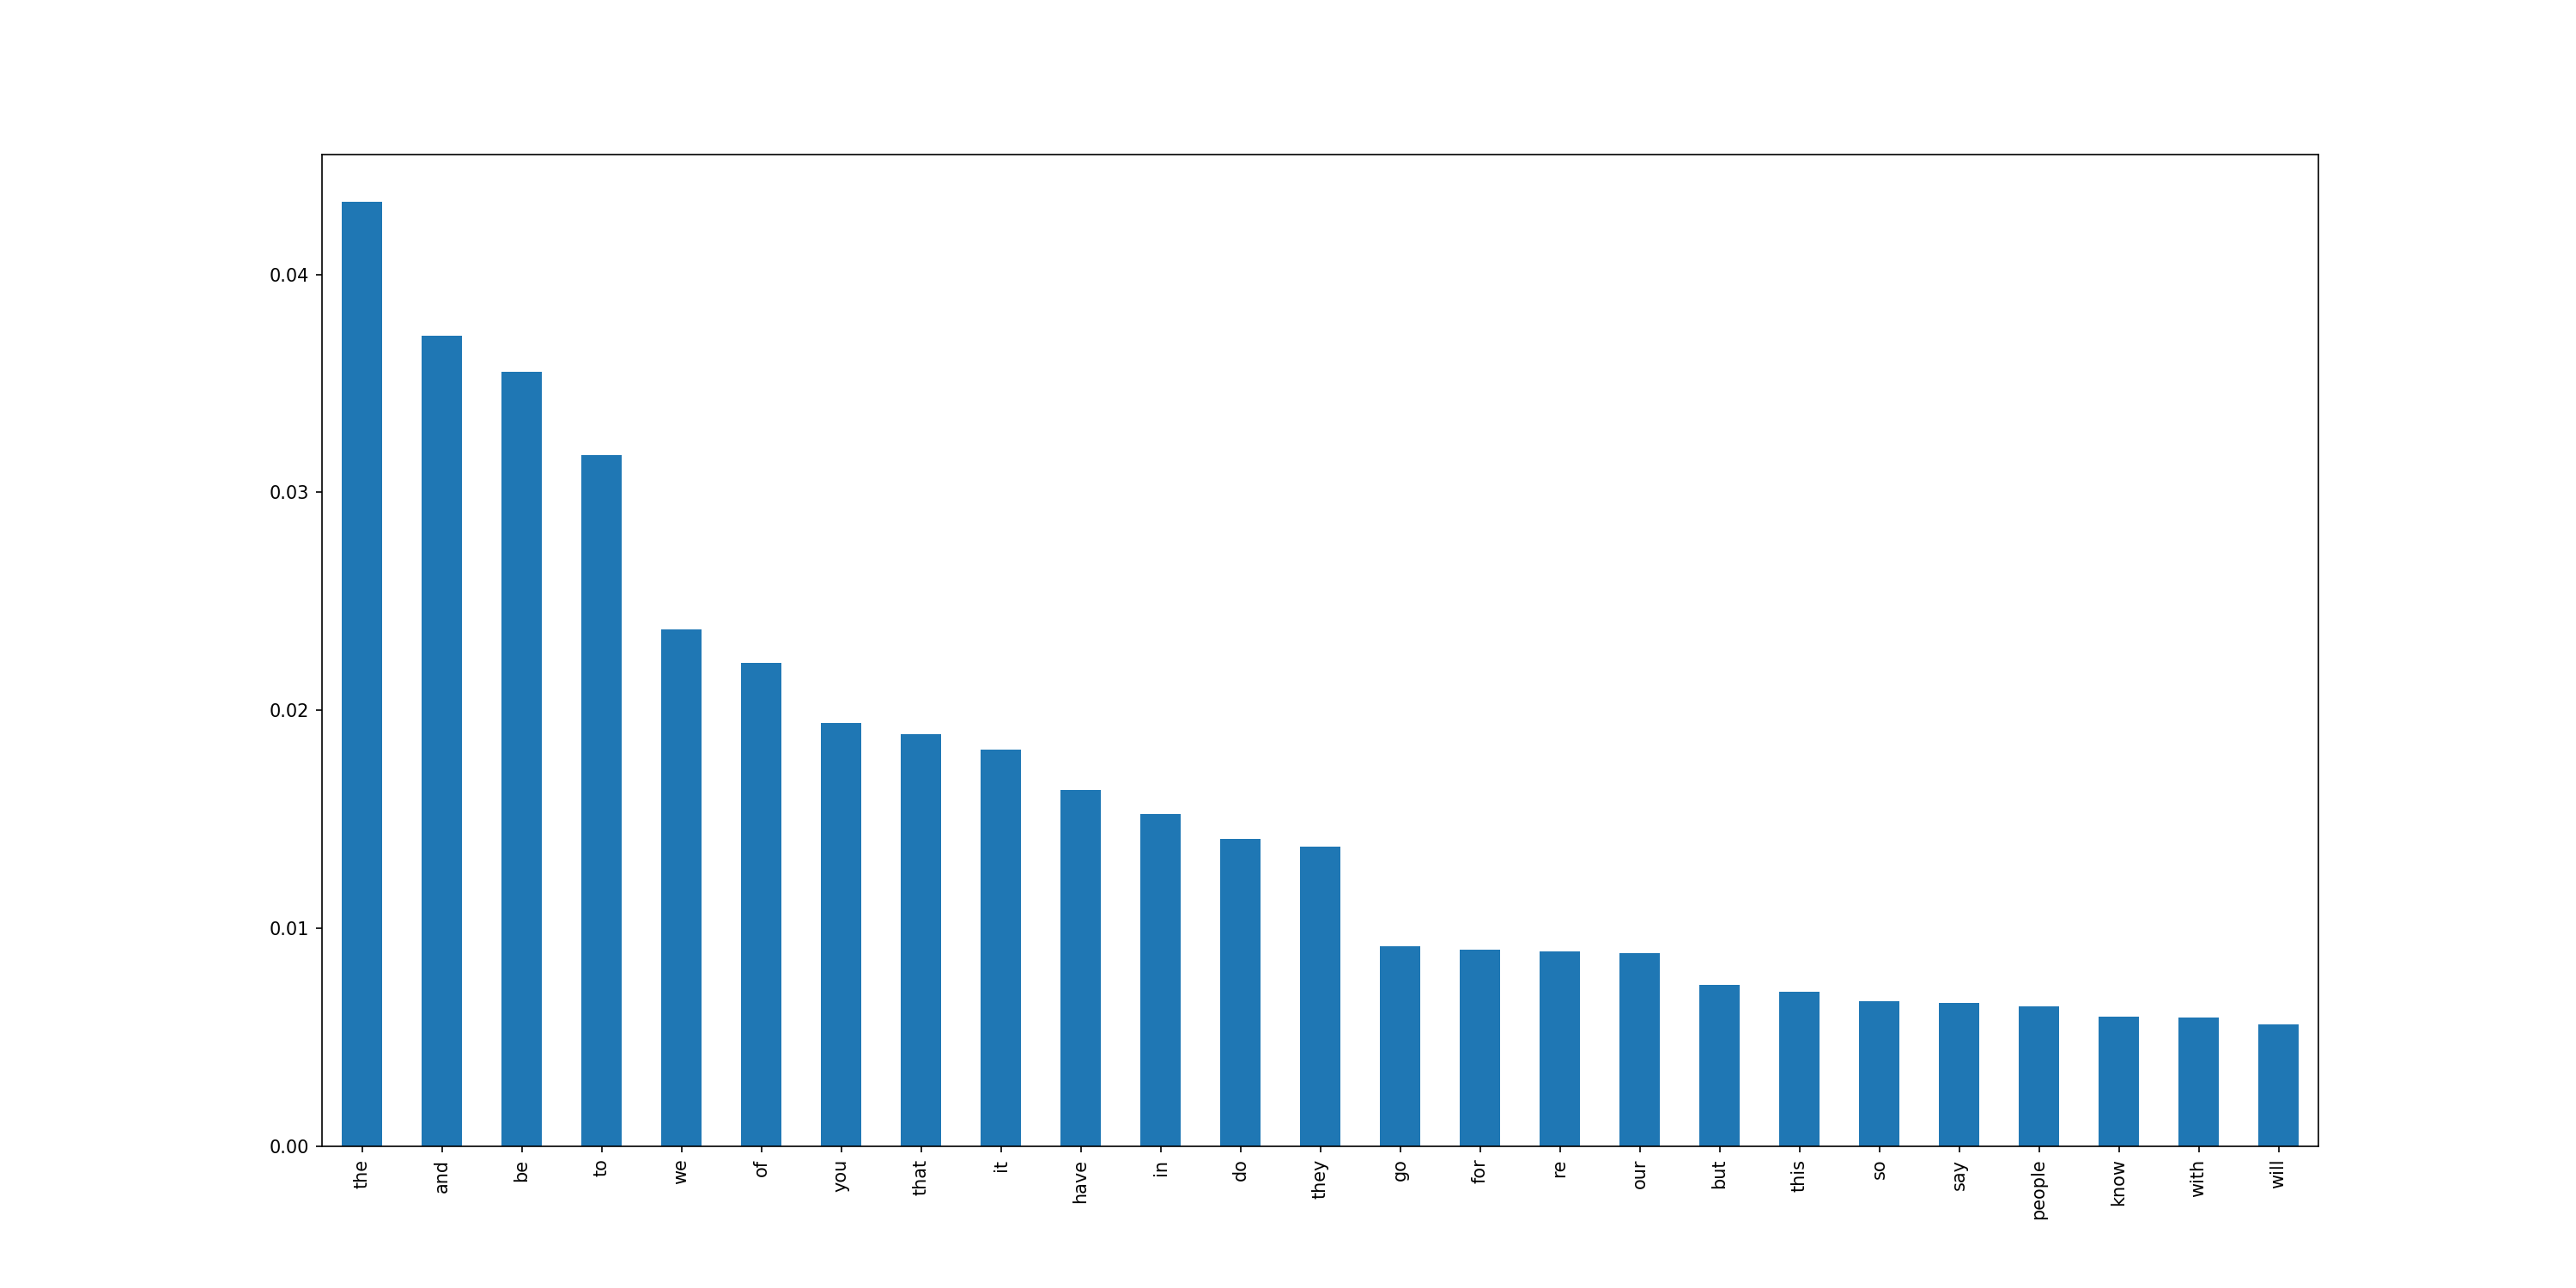

In [21]:
sums_filter= sums_filter.sort_values(ascending= False)
top_100= sums_filter[:25]/total
import matplotlib.pyplot as plt
top_100.plot(kind="bar", figsize=(20,10))

In [57]:
import matplotlib.pyplot as plt
%matplotlib notebook
def filter_by_name(names_list):
    #h= 1
    for i in names_list:
        name = df['Name'] == str(i)
        name_data = df[name]
        name_sum = name_data.sum(axis=0)
        name_sum = name_sum.drop(['Date', 'Title', 'Name'])
        name_sum = name_sum.astype('int64') #convert from object to int64 type
        name_sum = name_sum.sort_values(ascending= False)
        top25= name_sum[:25]
        
        fig = plt.figure(figsize=plt.figaspect(1.))
        #ax= fig.add_subplot(2, 2, h)
        top25.plot(kind="bar")
        plt.title(str(i))
        plt.xlabel('Top 25 Words')
        plt.ylabel('Frequencies')
        
        #h+=1
        print(name_sum['police'])
        
def name_summary(names):
    for i in names:
        name = df['Name'] == str(i)
        name_data = df[name]
        name_sum = name_data.sum(axis=0)
        name_sum = name_sum.drop(['Date', 'Title', 'Name'])
        name_sum = name_sum.astype('int64')
        name_sum= name_sum[name_sum != 0] # To remove rows that have 0 in it

        #Getting total no.
        total= name_sum.sum(axis=0)   
        distinct= name_sum.count()
        print("There are a total of", total, "values and", distinct, "distinct values for", str(i) + ".")
        
        #Distinct words
        words= name_sum.filter(regex= '^[A-Za-z]+$', axis=0)
        words_distinct= words.count()
        print(str(i) + " has used", words_distinct, "distinct words altogether.")
        
        #print("Most common word for " + str(i) + " is" + " '" + name_sum.idxmax() + "'" + ", occuring", name_sum.max(), "times.")

        #Getting median frequency of word
        median= name_sum.median()
        print("The median frequemcy of words for " + str(i) + " is " + str(median))

        #Getting mean frequency of word
        mean= int(name_sum.mean())
        print("The mean frequemcy of words for " + str(i) + " is " + str(mean))
        print() 
    
names= df['Name'].unique().tolist()
filter_by_name(names)
name_summary(names)

There are a total of 94332 values and 4194 distinct values for Scott Morrison.
Scott Morrison has used 4047 distinct words altogether.
The median frequemcy of words for Scott Morrison is 3.0
The mean frequemcy of words for Scott Morrison is 22

There are a total of 2196138 values and 7752 distinct values for Donald Trump.
Donald Trump has used 7489 distinct words altogether.
The median frequemcy of words for Donald Trump is 18.0
The mean frequemcy of words for Donald Trump is 283

There are a total of 477084 values and 6157 distinct values for Theresa May.
Theresa May has used 5948 distinct words altogether.
The median frequemcy of words for Theresa May is 8.0
The mean frequemcy of words for Theresa May is 77



In [48]:
%matplotlib notebook
date_frame= df.copy()
date= date_frame['Date'].str.split(" ",n = 2, expand = True)#n controls how many splits I'm having, expand expands the splits to separate columns
date_frame['Date']= date[2]
year= date[2].unique().tolist()

h= []
for i in year:
    if isinstance(i, str) == False:
        h.append(i)
    elif i.isnumeric() == False:
        h.append(i)

for i in h:
    year.remove(i) #doing it this way, otherwise if I just did remove above, all won't be removed, as some will be skipped over 
    
def yearly_plot(year):
    years = date_frame['Date'] == year
    year_plot= date_frame[years]
    year_sum = year_plot.sum(axis=0)
    year_sum = year_sum.drop(['Date', 'Title', 'Name'])
    year_sum = year_sum.astype('int64') #convert from object to int64 type
    print("Most common word for " + year + " is" + " '" + year_sum.idxmax() + "'" + ", occuring", year_sum.max(), "times.")
    year_sum = year_sum.sort_values(ascending= False)
    top25= year_sum[:25]
        
    fig = plt.figure(figsize=plt.figaspect(1.))
    #ax= fig.add_subplot(2, 2, h)
    top25.plot(kind="bar")
    plt.title(year)
    
def yearly_summary(year):
    years = date_frame['Date'] == year
    year_plot= date_frame[years]
    year_sum = year_plot.sum(axis=0)
    year_sum = year_sum.drop(['Date', 'Title', 'Name'])
    year_sum = year_sum.astype('int64')
    year_sum= year_sum[year_sum != 0] # To remove rows that have 0 in it
    
    #Getting total no.
    total= year_sum.sum(axis=0)   
    distinct= year_sum.count()
    print("There are a total of", total, "values and", distinct, "distinct values in", year + ".")
    
    #Getting median frequency of word
    median= year_sum.median()
    print("The median frequemcy of words in this year is", median)
     
    #Getting mean frequency of word
    mean= year_sum.mean()
    print("The mean frequemcy of words in this year is", int(mean))
    print()
    
    

    
for i in sorted(year):
    yearly_summary(i)
    yearly_plot(i)

There are a total of 21886 values and 2263 distinct values in 2010.
The median frequemcy of words in this year is 2.0
The mean frequemcy of words in this year is 9

There are a total of 55318 values and 3089 distinct values in 2011.
The median frequemcy of words in this year is 3.0
The mean frequemcy of words in this year is 17

There are a total of 33962 values and 2532 distinct values in 2012.
The median frequemcy of words in this year is 3.0
The mean frequemcy of words in this year is 13

There are a total of 19095 values and 2132 distinct values in 2013.
The median frequemcy of words in this year is 2.0
The mean frequemcy of words in this year is 8

There are a total of 37741 values and 2876 distinct values in 2014.
The median frequemcy of words in this year is 3.0
The mean frequemcy of words in this year is 13

There are a total of 34458 values and 2638 distinct values in 2015.
The median frequemcy of words in this year is 2.0
The mean frequemcy of words in this year is 13

There 

In [35]:
print(date_frame)

      00  000   10  100  1000  100th  101  102  103  104  ...  zealand  zero  \
0    0.0  1.0  4.0  2.0   0.0    0.0  0.0  0.0  0.0  0.0  ...      0.0   0.0   
1    0.0  1.0  0.0  0.0   0.0    0.0  0.0  0.0  0.0  0.0  ...      0.0   0.0   
2    0.0  5.0  1.0  3.0   0.0    0.0  0.0  0.0  0.0  0.0  ...      4.0   1.0   
3    0.0  5.0  2.0  1.0   0.0    0.0  0.0  0.0  0.0  0.0  ...      0.0   0.0   
4    0.0  2.0  2.0  1.0   0.0    0.0  0.0  0.0  0.0  0.0  ...      0.0   0.0   
5    0.0  0.0  1.0  0.0   0.0    0.0  0.0  0.0  0.0  0.0  ...      0.0   0.0   
6    0.0  0.0  1.0  0.0   0.0    0.0  0.0  0.0  0.0  0.0  ...      0.0   0.0   
7    0.0  0.0  0.0  0.0   0.0    0.0  0.0  0.0  0.0  0.0  ...      2.0   0.0   
8    0.0  4.0  3.0  0.0   0.0    0.0  0.0  0.0  0.0  0.0  ...      1.0   1.0   
9    0.0  5.0  4.0  2.0   0.0    0.0  0.0  0.0  0.0  0.0  ...      0.0   0.0   
10   0.0  0.0  0.0  0.0   0.0    0.0  0.0  0.0  0.0  0.0  ...      0.0   0.0   
11   0.0  1.0  1.0  2.0   0.0    0.0  0.